In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap

data = pd.read_excel('./HW2-Synth-Data.xls');

In [2]:
X = data.iloc[:, [0,1]].values
y = data.iloc[:, 2].values

In [ ]:
s1 = svm.LinearSVC()
param_grid = [{'C': [1, 10, 100, 1000]}]
clf1 = GridSearchCV(estimator=s1, param_grid=param_grid, cv=5)
clf1.fit(X, y)
print('Best score: {}'.format(clf1.best_score_))
print('Best parameters: {}'.format(clf1.best_params_))
s2 = svm.SVC()
param_grid2 = [{'C': [0.5, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
clf2 = GridSearchCV(estimator=s2, param_grid=param_grid2, cv=5)
clf2.fit(X, y)
print('Best score: {}'.format(clf2.best_score_))
print('Best parameters: {}'.format(clf2.best_params_))

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)







C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


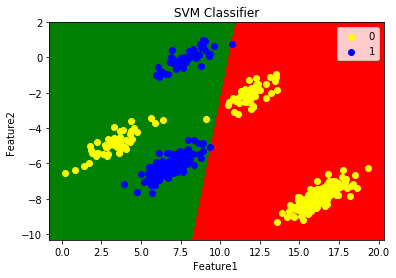

In [6]:
s1 = svm.LinearSVC(C=1)
s1.fit(X,y)
X1,X2 = np.meshgrid(np.arange(start = X[:,0].min()-1, stop = X[:,0].max()+1, step= 0.01),np.arange(start = X[:,1].min()-1, stop = X[:,1].max()+1, step= 0.001))
plt.contourf(X1,X2,s1.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j,1],c = ListedColormap(('yellow','blue'))(i), label = j)
plt.title('SVM Classifier')
plt.xlabel('Feature1 ')
plt.ylabel('Feature2 ')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


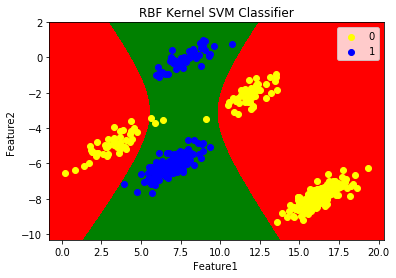

In [26]:
X1,X2 = np.meshgrid(np.arange(start = X[:,0].min()-1, stop = X[:,0].max()+1, step= 0.01),np.arange(start = X[:,1].min()-1, stop = X[:,1].max()+1, step= 0.01))
plt.contourf(X1,X2,clf2.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j,1],c = ListedColormap(('yellow','blue'))(i), label = j)
plt.title('RBF Kernel SVM Classifier')
plt.xlabel('Feature1 ')
plt.ylabel('Feature2 ')
plt.legend()
plt.show()

In [35]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [36]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

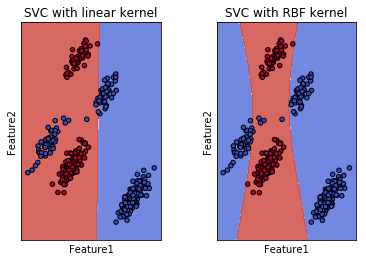

In [48]:

C1 = 0.5  # SVM regularization parameter
C2 = 1
g = 0.01
models = (svm.SVC(kernel='linear',C=C1),
          svm.SVC(kernel='rbf', gamma=g, C=C2))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature1')
    ax.set_ylabel('Feature2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

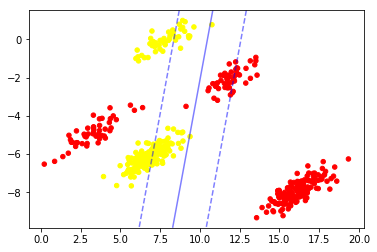

In [9]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='b',
               levels=[-0.25, 0, 0.25], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=2.5, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
plot_svc_decision_function(s1);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


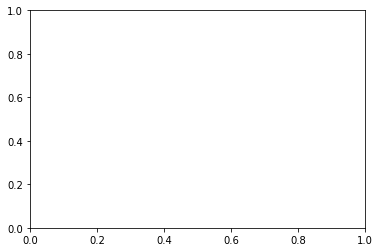

In [77]:
s2 = SVC(C= 1000, gamma= 0.001, kernel= 'rbf')
sf2 = s2.fit(X,y)
plot_svc_decision_function(s2);

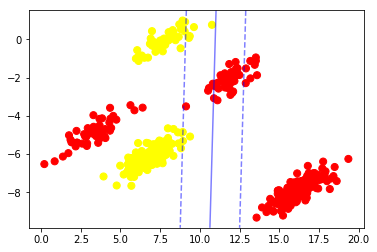

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(s1)
plt.scatter(s1.support_vectors_[:, 0], s1.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

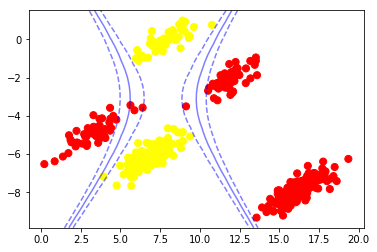

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(s2)
plt.scatter(s2.support_vectors_[:, 0], s2.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

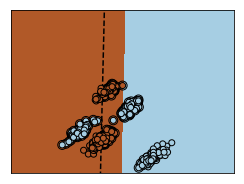

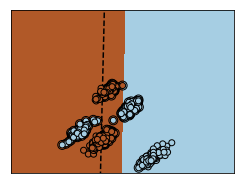

In [29]:
# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.5)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-10, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=50, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=50, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -8.8
    x_max = 30.2
    y_min = -10
    y_max = 10

    XX, YY = np.mgrid[x_min:x_max:600j, y_min:y_max:600j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(8, 8))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

No handles with labels found to put in legend.


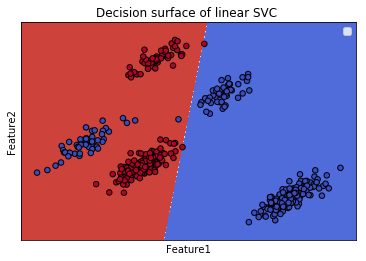

In [17]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, s1, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('Feature2')
ax.set_xlabel('Feature1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [27]:
h = .02  # step size in the mesh

names = ["RBF SVM"]
classifiers = [SVC(gamma=0.001, C=1000)]

figure = plt.figure(figsize=(27, 9))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1)
    # Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    # and testing points
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1,1)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X[:, 0], X[:, 1], c=y_train, cmap=cm_bright)
        # and testing points

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()

IndentationError: unexpected indent (<ipython-input-27-7a8edcc3dc4d>, line 26)

No handles with labels found to put in legend.


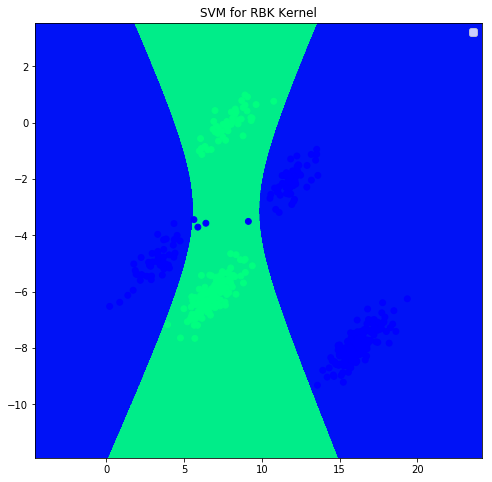

In [30]:
def plot_decision_boundary(model,X,y):
    padding=0.25
    res=0.02
    
    #max and min values of x and y of the dataset
    x_min,x_max=X[0:,0].min(), X[0:,0].max()
    y_min,y_max=X[0:,1].min(), X[0:,1].max()
    
    #range of x's and y's
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,8))
    cs = plt.contourf(xx, yy, Z, cmap='winter')
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap='winter')
    plt.legend()
    plt.title('SVM for RBK Kernel')
    
plot_decision_boundary(clf2,X,y)